Importing neccessary libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier, StackingClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

Loading dataset

In [3]:
df=pd.read_csv("Apps_data+.csv")
df.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up


Data Cleansing and EDA

In [4]:
#Going through all the columns in dataset
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [5]:
df.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up


In [6]:
#checking basic info of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [7]:
df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [8]:
df.describe(include="O")

,App,Category,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
count,10841,10841,10841,10841,10841,10840,10841,10840,10841,10841,10833,10838
unique,9660,34,6002,462,22,3,93,6,120,1378,2832,33
top,ROBLOX,FAMILY,0,Varies with device,"1,000,000+",Free,0,Everyone,Tools,"August 3, 2018",Varies with device,4.1 and up
freq,9,1972,596,1695,1579,10039,10040,8714,842,326,1459,2451


In [9]:
# Checking for duplicate values
duplicate_df=df.duplicated()
print(list(duplicate_df).count("True"))

0


In [10]:
# Checking unique categories of 'Category'
df['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

In [11]:
#dropping invalid category
df.drop(df[df.Category == '1.9'].index, inplace=True)
df['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

In [12]:
#checking null values
df['Rating'].isnull().sum()

1474

1474 rows in the data set have null values

<AxesSubplot:>

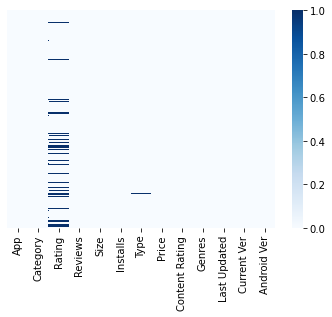

In [13]:
#heatmap to show the null values
sns.heatmap(df.isnull(), yticklabels=False, cmap='Blues')

In [14]:
#dropping the null values
df = df.dropna(how='any',axis=0) 
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

<AxesSubplot:>

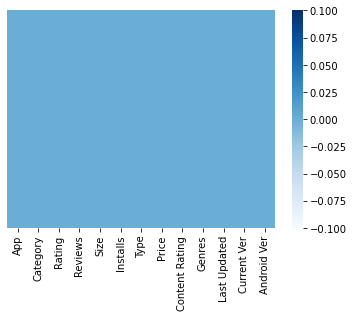

In [15]:
#heatmap after dropping null values
sns.heatmap(df.isnull(), yticklabels=False, cmap='Blues')

In [16]:
#categorizing 'Rating' column in a new column
df["Rating Category"] = np.where(df["Rating"] > 3.5, "High", "Low")
df.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Rating Category
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,High
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,High


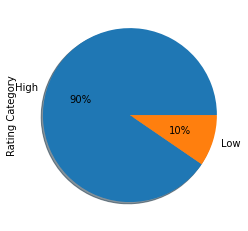

In [17]:
# Checking the distribution of new column 'Rating Category'
df['Rating Category'].value_counts().plot(kind='pie',autopct='%1.0f%%', shadow=True)
plt.show()

It is clear from the above distribution that most of the apps are rated >3.5

In [18]:
#checking the datatype of 'Reviews' column
df.dtypes

App                 object
Category            object
Rating             float64
Reviews             object
Size                object
Installs            object
Type                object
Price               object
Content Rating      object
Genres              object
Last Updated        object
Current Ver         object
Android Ver         object
Rating Category     object
dtype: object

In [19]:
#converting the datatype of 'Reviews' column
df['Reviews']=pd.to_numeric(df['Reviews'])
df.dtypes

App                 object
Category            object
Rating             float64
Reviews              int64
Size                object
Installs            object
Type                object
Price               object
Content Rating      object
Genres              object
Last Updated        object
Current Ver         object
Android Ver         object
Rating Category     object
dtype: object

<AxesSubplot:xlabel='Reviews'>

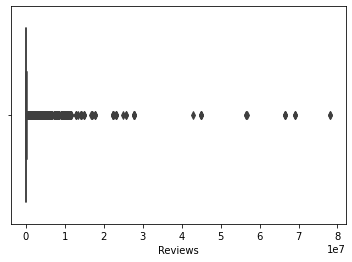

In [20]:
#checking outliers
sns.boxplot(x=df['Reviews'])

In [21]:
#checking skewness before tranformation
df[['Reviews']].skew()

Reviews    15.303031
dtype: float64

In [22]:
#handling outliers by square root transformation approach
df['Reviews'] = np.sqrt(df['Reviews'])
df['Reviews'] = np.sqrt(df['Reviews'])

<AxesSubplot:xlabel='Reviews'>

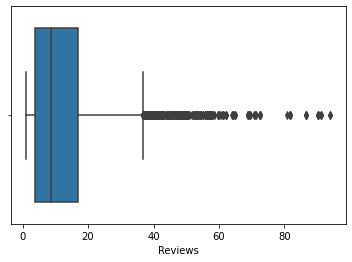

In [23]:
sns.boxplot(x=df['Reviews'])

In [24]:
#checking skewness after ransformation
df[['Reviews']].skew()

Reviews    1.995387
dtype: float64

In [25]:
#checking the column entries for the column 'Size'
df['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '5.5M', '17M', '39M', '31M',
       '4.2M', '23M', '6.0M', '6.1M', '4.6M', '9.2M', '5.2M', '11M',
       '24M', 'Varies with device', '9.4M', '15M', '10M', '1.2M', '26M',
       '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k', '3.6M', '5.7M',
       '8.6M', '2.4M', '27M', '2.7M', '2.5M', '7.0M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '22M', '6.4M', '3.2M', '8.2M', '4.9M', '9.5M', '5.0M',
       '5.9M', '13M', '73M', '6.8M', '3.5M', '4.0M', '2.3M', '2.1M',
       '42M', '9.1M', '55M', '23k', '7.3M', '6.5M', '1.5M', '7.5M', '51M',
       '41M', '48M', '8.5M', '46M', '8.3M', '4.3M', '4.7M', '3.3M', '40M',
       '7.8M', '8.8M', '6.6M', '5.1M', '61M', '66M', '79k', '8.4M',
       '3.7M', '118k', '44M', '695k', '1.6M', '6.2M', '53M', '1.4M',
      

In [26]:
#dropping rows with 'Varies with device' as entry
df.drop(df[df.Size == 'Varies with device'].index, inplace=True)

In [27]:
#converting M -> 1000000, k -> 1000
for i in df.index:
    if df.at[i, 'Size'][-1]=='M':
         df.at[i, 'Size']= float(df.at[i,'Size'][:-1])*1000000
    else:
        df.at[i, 'Size'] = float(df.at[i,'Size'][:-1])*1000

In [28]:
#checking column entries after conversion
df["Size"].unique()

array([19000000.0, 14000000.0, 8700000.0, 25000000.0, 2800000.0,
       5600000.0, 29000000.0, 33000000.0, 3100000.0, 28000000.0,
       12000000.0, 20000000.0, 21000000.0, 37000000.0, 5500000.0,
       17000000.0, 39000000.0, 31000000.0, 4200000.0, 23000000.0,
       6000000.0, 6100000.0, 4600000.0, 9200000.0, 5200000.0, 11000000.0,
       24000000.0, 9400000.0, 15000000.0, 10000000.0, 1200000.0,
       26000000.0, 8000000.0, 7900000.0, 56000000.0, 57000000.0,
       35000000.0, 54000000.0, 201000.0, 3600000.0, 5700000.0, 8600000.0,
       2400000.0, 27000000.0, 2700000.0, 2500000.0, 7000000.0, 16000000.0,
       3400000.0, 8900000.0, 3900000.0, 2900000.0, 38000000.0, 32000000.0,
       5400000.0, 18000000.0, 1100000.0, 2200000.0, 4500000.0, 9800000.0,
       52000000.0, 9000000.0, 6700000.0, 30000000.0, 2600000.0, 7100000.0,
       22000000.0, 6400000.0, 3200000.0, 8199999.999999999, 4900000.0,
       9500000.0, 5000000.0, 5900000.0, 13000000.0, 73000000.0, 6800000.0,
       3500000.

In [29]:
#checking datatype of the column 'Size'
df.dtypes

App                 object
Category            object
Rating             float64
Reviews            float64
Size                object
Installs            object
Type                object
Price               object
Content Rating      object
Genres              object
Last Updated        object
Current Ver         object
Android Ver         object
Rating Category     object
dtype: object

In [30]:
#converting datatype to numeric
df['Size']=pd.to_numeric(df['Size'])

In [31]:
#checking datatype after conversion
df.dtypes

App                 object
Category            object
Rating             float64
Reviews            float64
Size               float64
Installs            object
Type                object
Price               object
Content Rating      object
Genres              object
Last Updated        object
Current Ver         object
Android Ver         object
Rating Category     object
dtype: object

In [32]:
#checking all unique entries in the column 'Installs'
df['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000+', '500,000,000+', '100+', '500+', '10+', '1,000,000,000+',
       '5+', '50+', '1+'], dtype=object)

In [33]:
#replacing unwanted characters 
df['Installs'] = df['Installs'].str.replace(',', '')
df['Installs'] = df['Installs'].str.replace('+', '1')

In [34]:
#checking the datatype of the column 'Installs'
df.dtypes

App                 object
Category            object
Rating             float64
Reviews            float64
Size               float64
Installs            object
Type                object
Price               object
Content Rating      object
Genres              object
Last Updated        object
Current Ver         object
Android Ver         object
Rating Category     object
dtype: object

In [35]:
#converting the datatype of the column
df['Installs']=pd.to_numeric(df['Installs'])

In [36]:
#checking the datatype of the column 'Installs' after conversion
df.dtypes

App                 object
Category            object
Rating             float64
Reviews            float64
Size               float64
Installs             int64
Type                object
Price               object
Content Rating      object
Genres              object
Last Updated        object
Current Ver         object
Android Ver         object
Rating Category     object
dtype: object

In [37]:
#checking the unique column entries for the column 'Price'
df['Price'].unique()

array(['0', '$4.99', '$6.99', '$7.99', '$3.99', '$5.99', '$2.99', '$1.99',
       '$9.99', '$0.99', '$9.00', '$5.49', '$10.00', '$24.99', '$11.99',
       '$79.99', '$16.99', '$14.99', '$29.99', '$12.99', '$3.49',
       '$10.99', '$7.49', '$1.50', '$19.99', '$15.99', '$33.99', '$39.99',
       '$2.49', '$4.49', '$1.70', '$1.49', '$3.88', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$1.59',
       '$6.49', '$1.29', '$299.99', '$379.99', '$37.99', '$18.99',
       '$389.99', '$8.49', '$1.75', '$14.00', '$2.00', '$3.08', '$2.59',
       '$19.40', '$15.46', '$8.99', '$3.04', '$13.99', '$4.29', '$3.28',
       '$4.60', '$1.00', '$2.90', '$1.97', '$2.56', '$1.20'], dtype=object)

In [38]:
#removing the unwanted character
df['Price'] = df['Price'].str.replace('$', '',regex=True)

In [39]:
#checking the column entries for the column 'Price' after handling
df.Price.unique()

array(['0', '4.99', '6.99', '7.99', '3.99', '5.99', '2.99', '1.99',
       '9.99', '0.99', '9.00', '5.49', '10.00', '24.99', '11.99', '79.99',
       '16.99', '14.99', '29.99', '12.99', '3.49', '10.99', '7.49',
       '1.50', '19.99', '15.99', '33.99', '39.99', '2.49', '4.49', '1.70',
       '1.49', '3.88', '399.99', '17.99', '400.00', '3.02', '1.76',
       '4.84', '4.77', '1.61', '1.59', '6.49', '1.29', '299.99', '379.99',
       '37.99', '18.99', '389.99', '8.49', '1.75', '14.00', '2.00',
       '3.08', '2.59', '19.40', '15.46', '8.99', '3.04', '13.99', '4.29',
       '3.28', '4.60', '1.00', '2.90', '1.97', '2.56', '1.20'],
      dtype=object)

In [40]:
#checking the datatype of 'Price' column
df.dtypes

App                 object
Category            object
Rating             float64
Reviews            float64
Size               float64
Installs             int64
Type                object
Price               object
Content Rating      object
Genres              object
Last Updated        object
Current Ver         object
Android Ver         object
Rating Category     object
dtype: object

In [41]:
#converting the datatype
df['Price']=pd.to_numeric(df['Price'])

In [42]:
#checking datatype after conversion
df.dtypes

App                 object
Category            object
Rating             float64
Reviews            float64
Size               float64
Installs             int64
Type                object
Price              float64
Content Rating      object
Genres              object
Last Updated        object
Current Ver         object
Android Ver         object
Rating Category     object
dtype: object

In [43]:
#dropping redundant columns
df=df.drop(['App','Rating','Genres','Last Updated','Current Ver','Android Ver'], axis=1)

In [44]:
#exploring shape after dropping of columns
df.shape

(7723, 8)

In [45]:
#Converting non numeric columns to numeric columns for categorial encoding
df["Rating Category"]=df["Rating Category"].replace({'High':1,"Low":0})
df['Type']=df['Type'].replace({'Free':0,'Paid':1})
df["Content Rating"]=df['Content Rating'].replace({'Everyone':0, 'Teen':1, 'Everyone 10+':2, 'Mature 17+':3,'Adults only 18+':4, 'Unrated':5})

In [46]:
#Nominal categorical encoding for the column 'Category'
category_freq=df.Category.value_counts().to_dict()
df.Category=df.Category.map(category_freq)

In [47]:
df.head(2)

,Category,Reviews,Size,Installs,Type,Price,Content Rating,Rating Category
0,58,3.550989,19000000.0,100001,0,0.0,0,1
1,58,5.576435,14000000.0,5000001,0,0.0,0,1


Few EDA on the data prepared

<AxesSubplot:xlabel='Type', ylabel='count'>

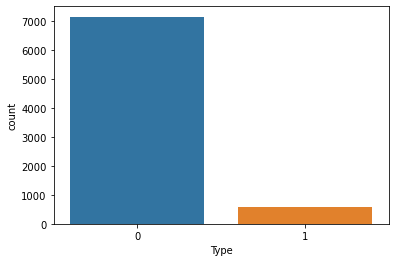

In [48]:
sns.countplot(x='Type', data=df)

<AxesSubplot:xlabel='count', ylabel='Content Rating'>

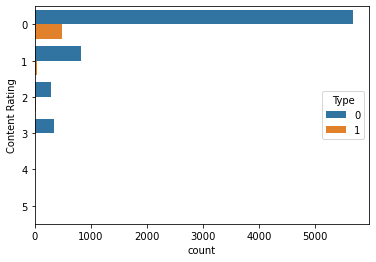

In [49]:
sns.countplot(y='Content Rating' ,hue = 'Type', data=df)

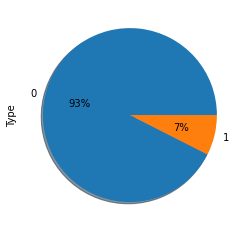

In [50]:
df['Type'].value_counts().plot(kind='pie',autopct='%1.0f%%', shadow=True)
plt.show()

<AxesSubplot:ylabel='Frequency'>

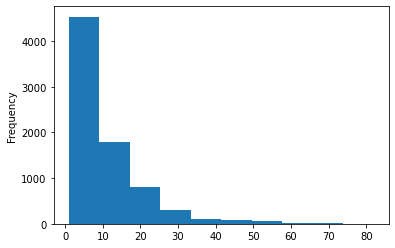

In [51]:
df['Reviews'].plot.hist()

In [52]:
#categorical encoding
df=pd.get_dummies(df,columns=['Type','Content Rating','Rating Category'], drop_first=True)

In [54]:
df.head(5)

,Category,Reviews,Size,Installs,Price,Type_1,Content Rating_1,Content Rating_2,Content Rating_3,Content Rating_4,Content Rating_5,Rating Category_1
0,58,3.550989,19000000.0,100001,0.0,0,0,0,0,0,0,1
1,58,5.576435,14000000.0,5000001,0.0,0,0,0,0,0,0,1
2,58,17.199445,8700000.0,50000001,0.0,0,0,0,0,0,0,1
3,58,21.549358,25000000.0,500000001,0.0,0,1,0,0,0,0,1
4,58,5.576435,2800000.0,1000001,0.0,0,0,0,0,0,0,1


In [55]:
# Segregating target and independent features
X = df.drop('Rating Category_1',axis=1)
y = df['Rating Category_1'] 

In [56]:
# Splitting the dataset into training and testing
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, random_state=45)
print(X_train.shape,X_test.shape)
print(y_train.shape,y_test.shape)

(5406, 11) (2317, 11)
(5406,) (2317,)


In [57]:
# Data standardizing
ssc = StandardScaler()
X_train.iloc[:,:] = ssc.fit_transform(X_train.iloc[:,:])
X_test.iloc[:,:] = ssc.transform(X_test.iloc[:,:])

In [58]:
# Function to fit and print model predictions
def fit_n_print(model, X_train, X_test, y_train, y_test):
    
    model.fit(X_train, y_train)   # fit the model with the train data
    pred = model.predict(X_test)  # make predictions on the test set
    train_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)

    print('Train accuracy: ',train_score)
    print('Test accuracy: ',test_score)
    print('Confusion matrix: ','\n',confusion_matrix(y_test, pred))

In [59]:
# Decision Tree Classifier
dt = DecisionTreeClassifier()
fit_n_print(dt, X_train, X_test, y_train, y_test)

Train accuracy:  1.0
Test accuracy:  0.8390159689253345
Confusion matrix:  
 [[  71  187]
 [ 186 1873]]


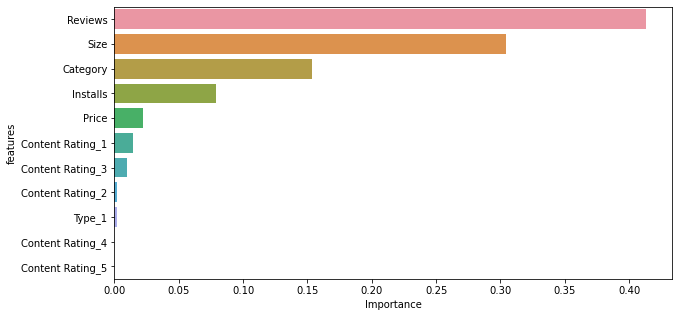

In [60]:
# Independent feature significance
feature_importances = pd.DataFrame({'features': X_train.columns, 'Importance': dt.feature_importances_})
feature_importances = feature_importances.sort_values('Importance',ascending=False).reset_index(drop=True)
plt.figure(figsize=(10,5))
sns.barplot(x='Importance',y='features',data=feature_importances)
plt.show()

In [61]:
# Random Forest Classifier
rf = RandomForestClassifier()
fit_n_print(rf, X_train, X_test, y_train, y_test)

Train accuracy:  1.0
Test accuracy:  0.889943892965041
Confusion matrix:  
 [[  30  228]
 [  27 2032]]


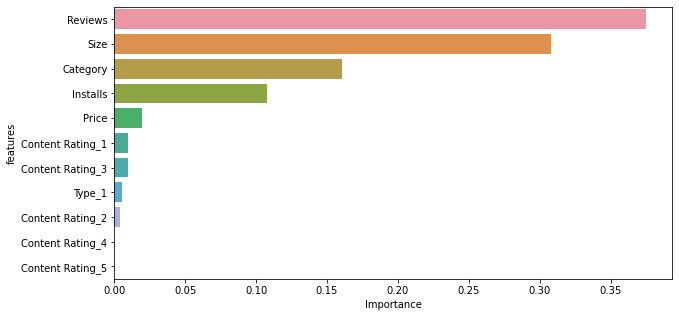

In [62]:
# Independent feature significance
feature_importances = pd.DataFrame({'features': X_train.columns, 'Importance': rf.feature_importances_})
feature_importances = feature_importances.sort_values('Importance',ascending=False).reset_index(drop=True)
plt.figure(figsize=(10,5))
sns.barplot(x='Importance',y='features',data=feature_importances)
plt.show()

In [65]:
# Gradient Boosting Classifier
gb = GradientBoostingClassifier()
fit_n_print(gb, X_train, X_test, y_train, y_test)

Train accuracy:  0.8960414354421014
Test accuracy:  0.8864911523521796
Confusion matrix:  
 [[   0  258]
 [   5 2054]]


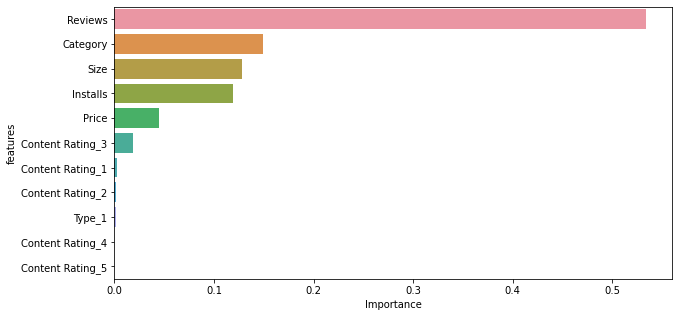

In [66]:
# Independent feature significance
feature_importances = pd.DataFrame({'features': X_train.columns, 'Importance': gb.feature_importances_})
feature_importances = feature_importances.sort_values('Importance',ascending=False).reset_index(drop=True)
plt.figure(figsize=(10,5))
sns.barplot(x='Importance',y='features',data=feature_importances)
plt.show()

In [67]:
# ADA Boosting Classifier
ab = AdaBoostClassifier()
fit_n_print(ab, X_train, X_test, y_train, y_test)

Train accuracy:  0.8934517203107658
Test accuracy:  0.8873543375053949
Confusion matrix:  
 [[   0  258]
 [   3 2056]]


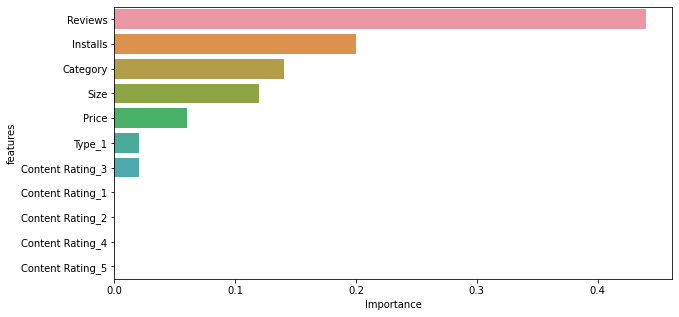

In [68]:
# Independent feature significance
feature_importances = pd.DataFrame({'features': X_train.columns, 'Importance': ab.feature_importances_})
feature_importances = feature_importances.sort_values('Importance',ascending=False).reset_index(drop=True)
plt.figure(figsize=(10,5))
sns.barplot(x='Importance',y='features',data=feature_importances)
plt.show()

Conclusions:

 - From the features vs importance plot, we can conclude that the 'Reviews' column has the greatest significance in predicting the rating of an app.
 - Along with 'Reviews', 'Category' ,'Size' and 'Installs' also play a much efficient role in the predictions.
 - 'Content Rating' and 'Type' has the least significance that shows that the age group and money doesn't matters much for the rating of and app.
 - For better results, a better dataset could be used that might include average time spent on the app and more type of data.    